In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd 
df=pd.read_csv("bankmarketing.csv")

print(df.info())
print(df.describe())
print(df.isnull().sum())

## Client Subscribed to a term deposite


In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='job', hue='y', data=df, palette='Set2')
plt.xticks(rotation=45)
plt.title("Job Type vs. Subscription ('y')")
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='marital', hue='y', data=df, palette='Set2')
plt.xticks(rotation=45)
plt.title("Marital vs. Subscription ('y')")
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='education', hue='y', data=df, palette='Set2')
plt.xticks(rotation=45)
plt.title("Education vs. Subscription ('y')")
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='housing', hue='y', data=df, palette='Set2')
plt.xticks(rotation=45)
plt.title("Housing vs. Subscription ('y')")
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='loan', hue='y', data=df, palette='Set2')
plt.xticks(rotation=45)
plt.title("Loan vs. Subscription ('y')")
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='day_of_week', hue='y', data=df, palette='Set2')
plt.xticks(rotation=45)
plt.title("Days vs. Subscription ('y')")
plt.show()

## classification model and derive insights

In [7]:
# 1. Importing model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix


==== Logistic Regression ====
              precision    recall  f1-score   support

           0       0.93      0.98      0.95      7310
           1       0.70      0.41      0.52       928

    accuracy                           0.91      8238
   macro avg       0.81      0.69      0.74      8238
weighted avg       0.90      0.91      0.90      8238



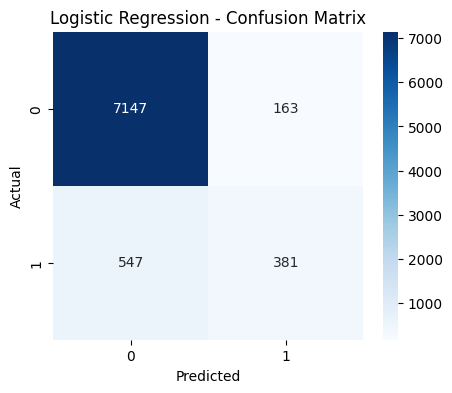


==== Random Forest ====
              precision    recall  f1-score   support

           0       0.94      0.97      0.96      7310
           1       0.69      0.53      0.60       928

    accuracy                           0.92      8238
   macro avg       0.81      0.75      0.78      8238
weighted avg       0.91      0.92      0.92      8238



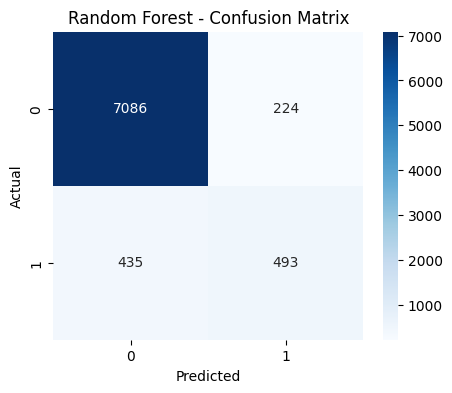


==== XGBoost ====
              precision    recall  f1-score   support

           0       0.95      0.96      0.95      7310
           1       0.65      0.56      0.60       928

    accuracy                           0.92      8238
   macro avg       0.80      0.76      0.78      8238
weighted avg       0.91      0.92      0.91      8238



c:\Users\gis28\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [00:33:58] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


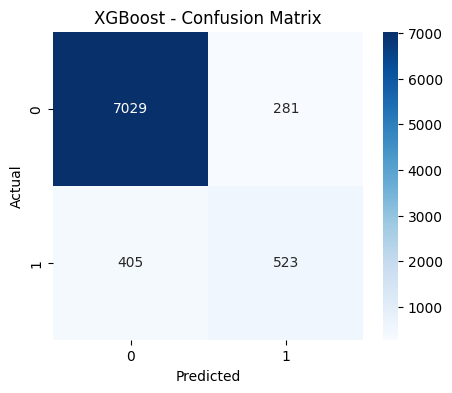

In [12]:
# 3. Preprocessing
# Encode categorical variables
categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 
                    'contact', 'month', 'day_of_week', 'poutcome']

label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Encode target
target_encoder = LabelEncoder()
df['y'] = target_encoder.fit_transform(df['y'])  # yes -> 1, no -> 0

# Scale numerical features
numerical_cols = ['age', 'duration', 'campaign', 'pdays', 'previous', 
                  'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# 4. Train-Test Split
X = df.drop('y', axis=1)
y = df['y']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 5. Model Building
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

# 6. Model Training and Evaluation
for name, model in models.items():
    print(f"\n==== {name} ====")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{name} - Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()